## RGU: 2506755
## IIT: 20240281
## Name: W.D.N.Nimsara

# Question 1

In [73]:
import sympy as sp

In [74]:
# symbolic values
x,y,a,b,c = sp.symbols('x y a b c', real=True, positive=True)

- x = Distance (km)
- y = Traffic delay (minutes per km)
- a = Effect of distance
- b = Effect of traffic congestion
- c = distance + traffic combined into minutes

In [75]:
#bus model
Tb = a*x**2 + b*y**2
print("Bus model")
display(Tb)

#taxi model
Tt = sp.sqrt(c*(x**2 + y**2))
print("\nTaxi model")
display(Tt)

Bus model


a*x**2 + b*y**2


Taxi model


sqrt(c)*sqrt(x**2 + y**2)

In [76]:
# Gradient for Bus
gradient_Tb_x = sp.diff(Tb, x) # Derivative with respect to x (x-component)
gradient_Tb_y = sp.diff(Tb, y) # Derivative with respect to y (y-component)
gradient_Tb = (gradient_Tb_x, gradient_Tb_y)
display(gradient_Tb)

(2*a*x, 2*b*y)

The component $2ax$ shows how quickly bus time increases when $x$ (Distance) increases, and $2by$ shows how quickly bus time increases when the $y$ (Traffic-delay) factor increases. If $2ax$ > $2by$ , distance has a greater impact; if $2by$ > $2ax$, traffic congestion has a greater impact.


In [77]:
# Gradient for Taxi
gradient_Tt_x = sp.diff(Tt, x) # Derivative with respect to x (x-component)
gradient_Tt_y = sp.diff(Tt, y) # Derivative with respect to y (y-component)
gradient_Tt = (gradient_Tt_x, gradient_Tt_y)
display(gradient_Tt)

(sqrt(c)*x/sqrt(x**2 + y**2), sqrt(c)*y/sqrt(x**2 + y**2))

Because both components share the same denominator, the relative impact depends mainly on $x$ vs $y$: if $x$ > $y$, distance affects travel time more; if $y$ > $x$, traffic affects travel time more. The square-root form means taxi travel time grows more smoothly than the bus model.

# Question 2


## (a)

In [78]:
t, x = sp.symbols('t x')

In [79]:
# fare function
bus_f = 2*t + 1
taxi_f = 3*t + 2

In [80]:
# integrate to get cost
Fb = sp.integrate(bus_f, (t, 0, x))
Ft = sp.integrate(taxi_f, (t, 0, x))
Fb , Ft

(x**2 + x, 3*x**2/2 + 2*x)

## (b)

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# convert sympy expressions to numpy functions
Fb_numpy = sp.lambdify(x, Fb, "numpy")
Ft_numpy = sp.lambdify(x, Ft, "numpy")

In [83]:
# distance range
ds = np.linspace(0, 5, 200)

In [84]:
# compute fares
fb_vals = Fb_numpy(ds)
ft_vals = Ft_numpy(ds)

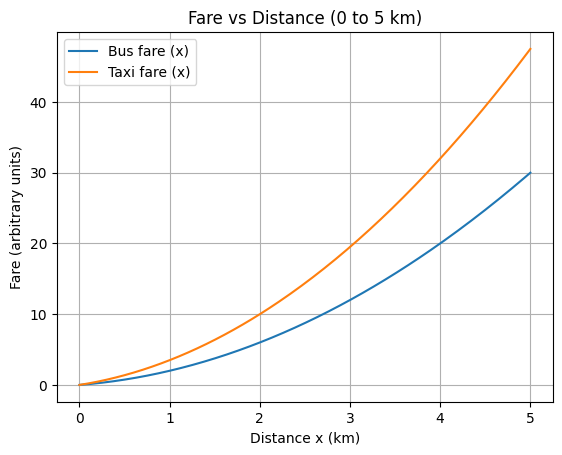

In [85]:
plt.figure()
plt.plot(ds, fb_vals, label="Bus fare (x)")
plt.plot(ds, ft_vals, label="Taxi fare (x)")
plt.xlabel("Distance x (km)")
plt.ylabel("Fare (arbitrary units)")
plt.title("Fare vs Distance (0 to 5 km)")
plt.grid(True)
plt.legend()
plt.show()

## (c)

- Short Trip (0-2km) : Affordability gap between the bus and taxi is minimal, meaning absolute price difference is also low. based on that, passenger might rationally choose the taxi. The slight increase in cost is likely worth the trade-off for the comfort and direct route a taxi offers on a short hop.
- Long Trip (2-5Km) : The curves diverge sharply after 2 km. By the time the route reaches 5 km, the taxi fare noticeably higher than the bus fare.For passengers who travel more that 2Km, the bus offers financial saving, making it the clear choice for budget optimization.

# Question 3

## (a)

In [86]:
t = sp.symbols('t')
P4 = 5 + 4*sp.sin(sp.pi*t) - sp.Rational(3,2)*t**2 + sp.Rational(1,4)*t**4

P4

t**4/4 - 3*t**2/2 + 4*sin(pi*t) + 5

## (b)

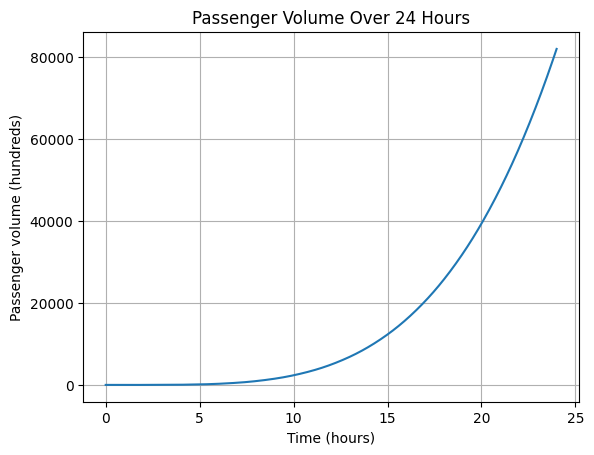

In [87]:
# Convert the symbolic expression P4 into a numerical function
P4_func = sp.lambdify(t, P4, "numpy")

# Create time values from 0 to 24 hours
ts = np.linspace(0, 24, 1000)
# Evaluate passenger volume for all time values
P_vals = P4_func(ts)

plt.figure()
plt.plot(ts, P_vals)
plt.xlabel("Time (hours)")
plt.ylabel("Passenger volume (hundreds)")
plt.title("Passenger Volume Over 24 Hours")
plt.grid(True)
plt.show()

## (c)

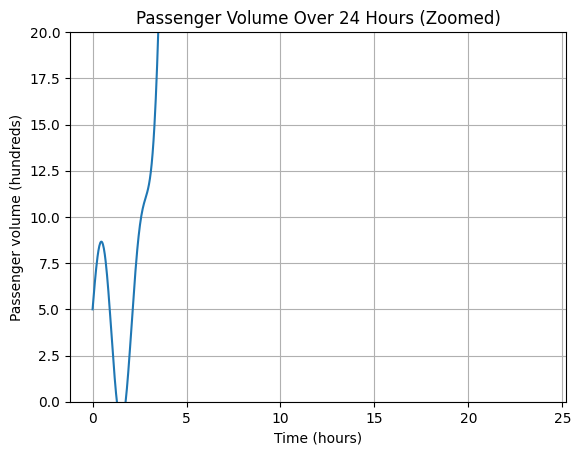

In [88]:
plt.figure()
plt.plot(ts, P_vals)
plt.xlabel("Time (hours)")
plt.ylabel("Passenger volume (hundreds)")
plt.title("Passenger Volume Over 24 Hours (Zoomed)")
plt.grid(True)
plt.ylim(0,20)
plt.show()

These graphs indicate peak travel periods. There is an initial peak during the early hours, which suggests early-morning travel demand, most likely from people starting their daily activities. After this, the passenger volume drops sharply to a very low level, indicating a non-peak period with minimal travel. Subsequently, the passenger volume shows a continuous increase until the end of the 24-hour period. However, this pattern is not realistic, because in real-world scenarios there should be distinct additional peaks, especially during evening travel demand, rather than a steady increase throughout the day. Most probably this limitation occurs due to the mathematical formula used in the model, which does not fully capture realistic daily travel behaviour.

# Question 4

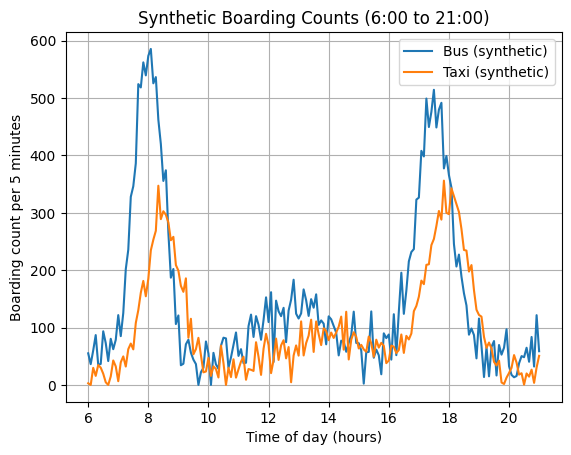

In [89]:
np.random.seed(42)

# every 5 minutes
dt_min = 5
dt_hr = dt_min / 60

# Time array from 6:00 AM to 9:00 PM
t = np.arange(6, 21 + dt_hr, dt_hr)
N = len(t)

# To create a rush-hour peak using a Gaussian curve
def peak(t, center, width, height):
    return height * np.exp(-0.5 * ((t - center) / width)**2)

# BUS data
bus = (
    40                                   # base boarding level
    + peak(t, 8.0, 0.50, 550)            # morning peak
    + peak(t, 17.5, 0.60, 450)           # evening peak
    + peak(t, 13.0, 1.20, 100)           # midday small peak
    + np.random.normal(0, 30, size=N)    # random noise
)
# Ensure no negative boarding counts
bus = np.clip(bus, 0, None)

# TAXI data
taxi = (
    20
    + peak(t, 8.5, 0.60, 260)             # morning peak
    + peak(t, 18.0, 0.70, 300)            # evening peak
    + peak(t, 14.0, 1.50, 70)             # midday bump
    + np.random.normal(0, 20, size=N)     # random noise
)
# Ensure no negative boarding counts
taxi = np.clip(taxi, 0, None)

plt.figure()
plt.plot(t, bus, label="Bus (synthetic)")
plt.plot(t, taxi, label="Taxi (synthetic)")
plt.xlabel("Time of day (hours)")
plt.ylabel("Boarding count per 5 minutes")
plt.title("Synthetic Boarding Counts (6:00 to 21:00)")
plt.grid(True)
plt.legend()
plt.show()


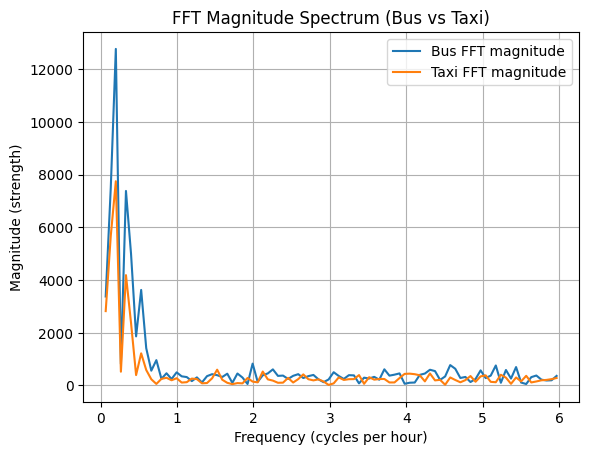

In [90]:
# Apply Fast Fourier Transform to bus and taxi time-series data
bus_fft = np.fft.fft(bus)
taxi_fft = np.fft.fft(taxi)

# Compute corresponding frequency values
freq = np.fft.fftfreq(N, dt_hr)

# Get magnitude(strength) of each component
bus_mag = np.abs(bus_fft)
taxi_mag = np.abs(taxi_fft)

# Select only positive frequencies
pos = freq > 0

# Plot FFT magnitude spectrum
plt.figure()
plt.plot(freq[pos], bus_mag[pos], label="Bus FFT magnitude")
plt.plot(freq[pos], taxi_mag[pos], label="Taxi FFT magnitude")
plt.xlabel("Frequency (cycles per hour)")
plt.ylabel("Magnitude (strength)")
plt.title("FFT Magnitude Spectrum (Bus vs Taxi)")
plt.grid(True)
plt.legend()
plt.show()


## (b)

This graph shows that the strongest frequencies for both bus and taxi are at very low frequencies (close to zero). Meaning that, passenger demand changes slowly over time and follows a daily pattern, such as morning and evening rush hours. The bus has much higher peaks at these low frequencies compared to the taxi, which shows that bus travel has more regular and predictable demand, mainly because buses follow fixed routes and schedules and are used by daily commuters. while Taxi demand, has lower and weaker peaks, meaning it is more irregular and depends on individual needs. At higher frequencies, both bus and taxi magnitudes are small, Meaning short-term rapid changes are not important. In conclusion, the dominant low-frequency components indicate that travel demand is mainly influenced by daily routine behaviour, with buses showing clearer and stronger peak travel patterns than taxis.

## (c)

Since the dominant frequencies (count) are low, travel demand follows predictable daily patterns, such as morning and evening rush hours. Therefore, bus services should be scheduled more frequently during these peak periods and reduced during low-demand times to avoid wasted resources. The stronger low-frequency peaks for buses indicate consistent and regular demand, so fixed timetables with higher capacity during peak hours are suitable. In contrast, taxi demand is more irregular and does not follow strict schedules; And taxi availability is largely determined by driver choice rather than central scheduling. So taxis cannot be scheduled in the same way as buses; Therefor, implementing incentive mechanisms such as higher fares or surge pricing during busy periods will encourage more drivers to operate.

# Question 5

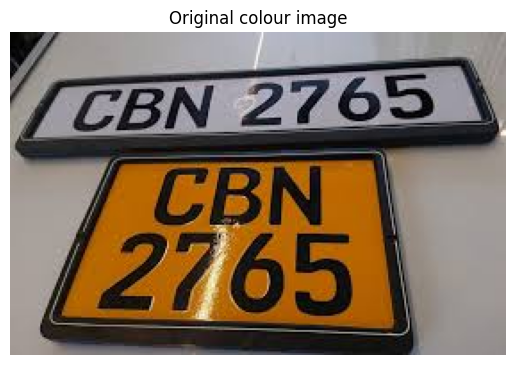

In [91]:
import cv2

img_path = "ehicle_plate.png"

# Read the image
img_bgr = cv2.imread(img_path)

# Convert BGR image to RGB for correct colour display
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_rgb)
plt.title("Original colour image")
plt.axis("off")
plt.show()


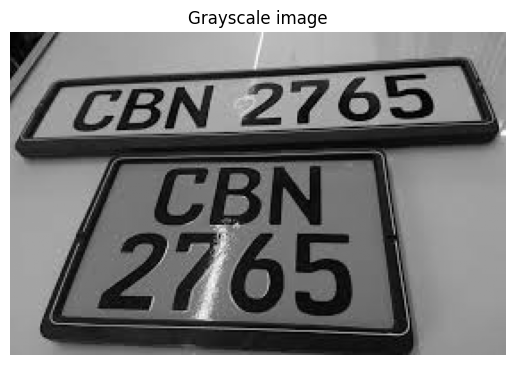

In [92]:
# To convert an RGB image to grayscale
def to_gray(rgb_img):
    # Convert RGB image to BGR
    bgr = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    # Convert BGR image to grayscale
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Convert
gray = to_gray(img_rgb)

plt.figure()
plt.imshow(gray, cmap="gray")
plt.title("Grayscale image")
plt.axis("off")
plt.show()


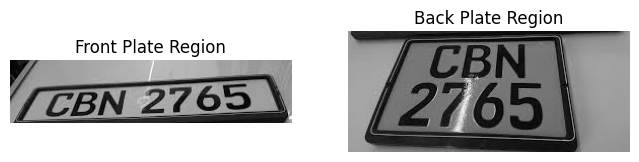

In [93]:
# Detect edges
edges = cv2.Canny(gray, 100, 200)

# Sum edge values along each row
row_sum = np.sum(edges, axis=1)

# Find the row with minimum edge content (plate separation line)
split_row = np.argmin(row_sum)

# Split into front plate
front_p = gray[:split_row, :]

# Split into back plate
back_p  = gray[split_row:, :]


plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(front_p, cmap='gray')
plt.title("Front Plate Region")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(back_p, cmap='gray')
plt.title("Back Plate Region")
plt.axis("off")

plt.show()


## (b)

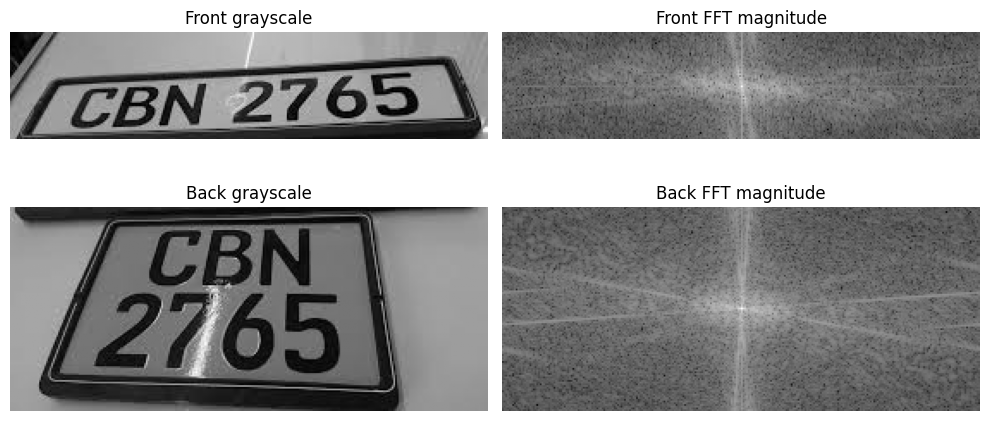

In [94]:
# To compute FFT magnitude of a grayscale image
def fft_magnitude(gray_img):
    # Apply 2D Fast Fourier Transform
    F = np.fft.fft2(gray_img)

    # Shift zero frequency component to the center
    F_shift = np.fft.fftshift(F)

    # Take magnitude and apply log scale for better visibility
    mag = np.log1p(np.abs(F_shift))

    return mag

# Convert to grayscale
front_gray = to_gray(front_p)
back_gray = to_gray(back_p)

# Compute FFT magnitude
front_fft_mag = fft_magnitude(front_gray)
back_fft_mag  = fft_magnitude(back_gray)


plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(front_gray, cmap="gray")
plt.title("Front grayscale")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(front_fft_mag, cmap="gray")
plt.title("Front FFT magnitude")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(back_gray, cmap="gray")
plt.title("Back grayscale")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(back_fft_mag, cmap="gray")
plt.title("Back FFT magnitude")
plt.axis("off")

plt.tight_layout()
plt.show()


## (c)

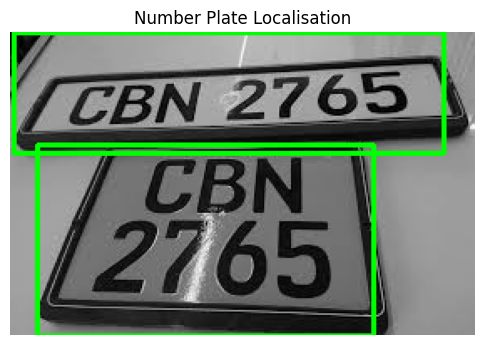

In [95]:
# find edges in image
edges = cv2.Canny(gray, 100, 200)

# Find external contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# to store number plate bounding boxes
plate_boxes = []

# Loop through each detected contour
for c in contours:

    # Get bounding rectangle for the contour
    x, y, w, h = cv2.boundingRect(c)

    # Calculate width to height ratio
    aspect_ratio = w / float(h)

    # Calculate area
    area = w * h

    # Filter contours
    if 1.5 < aspect_ratio < 6 and w > 80 and h > 30:
        plate_boxes.append((x, y, w, h, area))

# Sort detected boxes by area and keep the largest two
plate_boxes = sorted(plate_boxes, key=lambda b: b[4], reverse=True)[:2]

# Convert grayscale image to color (drawing rectangles)
detected = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Draw rectangles around detected number plates
for box in plate_boxes:
    x, y, w, h, _ = box
    cv2.rectangle(detected, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the final result
plt.figure(figsize=(6,4))
plt.imshow(detected)
plt.title("Number Plate Localisation")
plt.axis("off")
plt.show()


## (d)

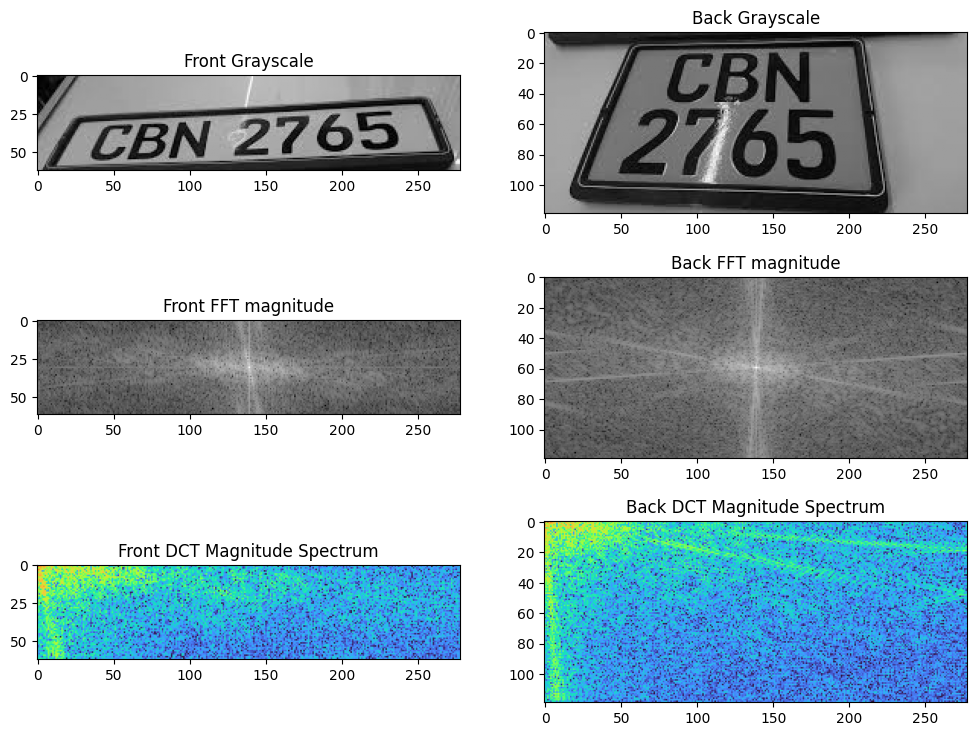

In [96]:
# Apply 2D Discrete Cosine Transform (DCT)
front_dct = cv2.dct(np.float32(front_gray))
back_dct = cv2.dct(np.float32(back_gray))

# Take logarithm for better visualization
front_dct_magnitude = np.log(np.abs(front_dct) + 1)
back_dct_magnitude = np.log(np.abs(back_dct) + 1)


# plot
plt.figure(figsize=(12,9))

plt.subplot(3,2,1)
plt.imshow(front_gray, cmap="gray")
plt.title("Front Grayscale")

plt.subplot(3,2,2)
plt.imshow(back_gray, cmap="gray")
plt.title("Back Grayscale")

plt.subplot(3,2,3)
plt.imshow(front_fft_mag, cmap="gray")
plt.title("Front FFT magnitude")

plt.subplot(3,2,4)
plt.imshow(back_fft_mag, cmap="gray")
plt.title("Back FFT magnitude")

plt.subplot(3,2,5)
plt.imshow(front_dct_magnitude, cmap='turbo')
plt.title("Front DCT Magnitude Spectrum")

plt.subplot(3,2,6)
plt.imshow(back_dct_magnitude, cmap='turbo')
plt.title("Back DCT Magnitude Spectrum")

plt.show()


The FFT (Fourier Transform) converts the image from the spatial domain to the frequency domain and shows how rapidly intensity changes occur in different directions. In FFT images, the bright centre indicates that most information is in low frequencies which means large smooth regions such as the number plate background dominate the image. The visible horizontal and vertical patterns show the presence of strong edges and straight lines, which maybe come from the rectangular shape of the plate and the printed characters.

The DCT (Discrete Cosine Transform) performs a similar analysis but is designed to concentrate most important information into a small number of coefficients. In DCT plots, the stronger values near the top-left region show that the essential structure of the number plate can be represented efficiently using low-frequency components. This makes DCT very useful for noise reduction, feature extraction, and compression.

In number plate recognition systems, FFT understand and emphasise edge orientation and structural patterns and DCT simplify the image data without losing key features. Together, they improve recognition accuracy and robustness. For traffic optimisation, these techniques support automated vehicle detection and tracking, enabling traffic flow analysis, congestion monitoring, and better planning of signals and routes based on reliable vehicle data.